In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
train = pd.read_csv('titanic_train.csv')

In [ ]:
train.head()

In [5]:
sns.set_style('whitegrid')

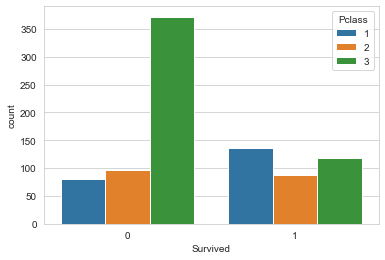

In [53]:
sns.countplot(x='Survived',data=train,hue='Pclass')

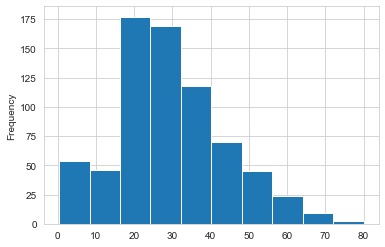

In [54]:
train['Age'].plot.hist()

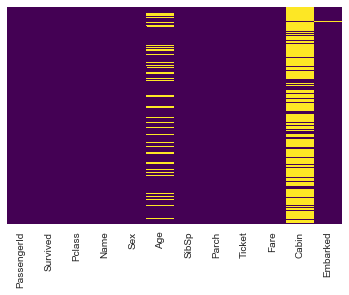

In [55]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

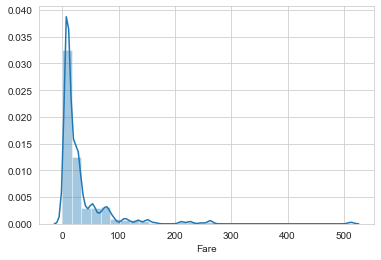

In [56]:
sns.distplot(train['Fare'],bins=30)

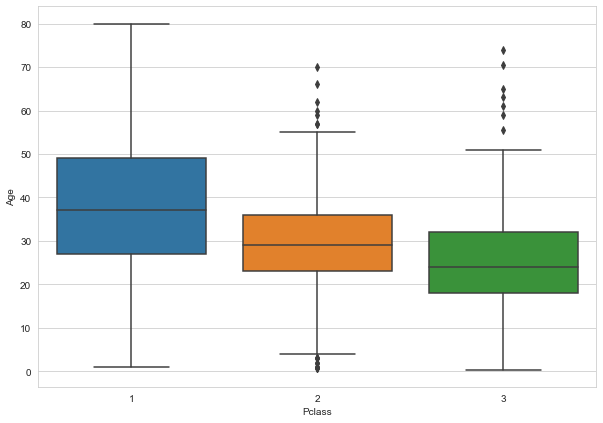

In [29]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train)

In [47]:
train[train['Pclass']==1]['Age'].mean()

nan

In [1]:
def impute_age(cols):
    age= cols[0]
    pclass = cols[1]
    if pd.isnull(age):
        if pclass ==1:
            return train[train['Pclass']==1]['Age'].mean()
        elif pclass == 2:
            return train[train['Pclass']==2]['Age'].mean()
        else:
            return train[train['Pclass']==3]['Age'].mean()
    else:
        return age
    
         

In [8]:

train['Age']

0      22.00000
1      38.00000
2      26.00000
3      35.00000
4      35.00000
         ...   
886    27.00000
887    19.00000
888    25.14062
889    26.00000
890    32.00000
Name: Age, Length: 891, dtype: float64

In [7]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

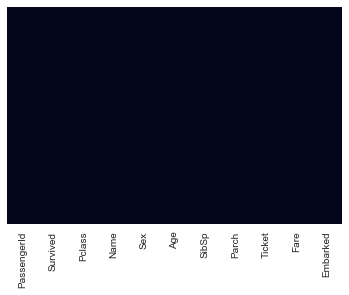

In [66]:
sns.heatmap(train.isnull(),yticklabels=False,cbar= False)

In [10]:
train.drop('Cabin',inplace=True,axis=1)

In [11]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

In [12]:
train.dropna(inplace=True)

In [13]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [14]:
embark=pd.get_dummies(train['Embarked'],drop_first=True)

In [15]:
train = pd.concat([train,sex,embark],axis=1)

In [19]:
train.drop(['PassengerId','Name',"Sex",'Embarked'],axis=1,inplace=True)

In [20]:
train.drop('Ticket',axis=1,inplace=True)

In [49]:
train.head()

Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0         0       3  22.0      1      0   7.2500     1  0  1
1         1       1  38.0      1      0  71.2833     0  0  0
2         1       3  26.0      0      0   7.9250     0  0  1
3         1       1  35.0      1      0  53.1000     0  0  1
4         0       3  35.0      0      0   8.0500     1  0  1

In [51]:
pclass = pd.get_dummies(train['Pclass'],drop_first=True)

In [62]:
train = pd.concat([train,pclass],axis=1)

In [67]:
train.head()

Survived   Age  SibSp  Parch     Fare  male  Q  S  2  3
0         0  22.0      1      0   7.2500     1  0  1  0  1
1         1  38.0      1      0  71.2833     0  0  0  0  0
2         1  26.0      0      0   7.9250     0  0  1  0  1
3         1  35.0      1      0  53.1000     0  0  1  0  0
4         0  35.0      0      0   8.0500     1  0  1  0  1

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
lodmodel = LogisticRegression()

In [68]:
x = train.drop('Survived',axis=1)
y = train['Survived']

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [71]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
Age      889 non-null float64
SibSp    889 non-null int64
Parch    889 non-null int64
Fare     889 non-null float64
male     889 non-null uint8
Q        889 non-null uint8
S        889 non-null uint8
2        889 non-null uint8
3        889 non-null uint8
dtypes: float64(2), int64(2), uint8(5)
memory usage: 79.1 KB


In [72]:
lodmodel.fit(x_train,y_train)

C:\Users\Adithya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [73]:
pred = lodmodel.predict(x_test)

In [74]:
from sklearn.metrics import confusion_matrix

In [75]:
print(confusion_matrix(y_test,pred))

[[149  14]
 [ 36  68]]


In [76]:
from sklearn.metrics import classification_report

In [77]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       163
           1       0.83      0.65      0.73       104

    accuracy                           0.81       267
   macro avg       0.82      0.78      0.79       267
weighted avg       0.81      0.81      0.81       267



In [134]:
test=pd.read_csv('titanic_test.csv')

In [135]:
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

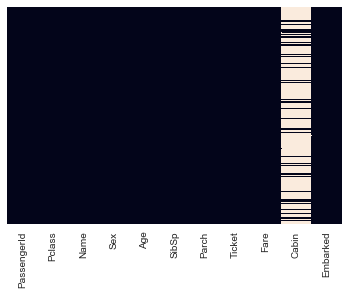

In [138]:
sns.heatmap(test.isnull(),cbar=False,yticklabels=False)

In [88]:
test[test['Pclass']==1]['Age'].mean()

40.91836734693877

In [89]:
def impute_age(cols):
    age= cols[0]
    pclass = cols[1]
    if pd.isnull(age):
        if pclass ==1:
            return test[test['Pclass']==1]['Age'].mean()
        elif pclass == 2:
            return test[test['Pclass']==2]['Age'].mean()
        else:
            return test[test['Pclass']==3]['Age'].mean()
    else:
        return age

In [139]:
test['Age']=test[['Age','Pclass']].apply(impute_age,axis=1)

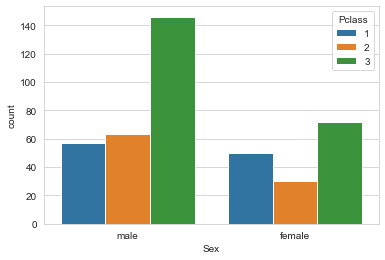

In [140]:
sns.countplot(x='Sex',data=test,hue='Pclass')

In [154]:
test.head()

PassengerId                                          Name   Age  SibSp  \
0          892                              Kelly, Mr. James  34.5      0   
1          893              Wilkes, Mrs. James (Ellen Needs)  47.0      1   
2          894                     Myles, Mr. Thomas Francis  62.0      0   
3          895                              Wirz, Mr. Albert  27.0      0   
4          896  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  22.0      1   

   Parch   Ticket     Fare Cabin  male    Q    S  2  3  
0      0   330911   7.8292   NaN   1.0  1.0  0.0  0  1  
1      0   363272   7.0000   NaN   0.0  0.0  1.0  0  1  
2      0   240276   9.6875   NaN   1.0  1.0  0.0  1  0  
3      0   315154   8.6625   NaN   1.0  0.0  1.0  0  1  
4      1  3101298  12.2875   NaN   0.0  0.0  1.0  0  1

In [153]:
test.drop(['Sex','Embarked'],axis=1,inplace=True)

KeyError: "['Sex' 'Embarked'] not found in axis"

In [143]:
sex = pd.get_dummies(test['Sex'],drop_first=True)

KeyError: 'Sex'

In [104]:
em = pd.get_dummies(test['Embarked'],drop_first=True)

In [144]:
test = pd.concat([test,sex,em],axis=1)

In [145]:
pclass = pd.get_dummies(test['Pclass'],drop_first=True)

In [146]:
test=pd.concat([test,pclass],axis=1)

In [155]:
test.drop(['Name','PassengerId'],axis=1,inplace=True)

In [160]:
test.drop('Cabin',axis=1,inplace=True)

In [168]:
test.drop('Ticket',axis=1,inplace=True)

In [182]:
test['S']=test['S'].fillna(1)

Age      0
SibSp    0
Parch    0
Fare     0
male     0
Q        0
S        0
2        0
3        0
dtype: int64

In [150]:
logmodel = LogisticRegression()

In [164]:
logmodel.fit(x,y)

C:\Users\Adithya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [185]:
pred = logmodel.predict(test)

In [186]:
final = pd.read_csv('gender_submission.csv')

In [201]:
ans.rename(columns={0:'Survived'})

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Length: 418, dtype: int64

In [206]:
final.drop('PassengerId',axis=1,inplace=True)

In [202]:
ans.head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

In [197]:
ans.to_csv('prediction.csv',index=False)

C:\Users\Adithya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [198]:
c = pd.read_csv('prediction.csv')

In [209]:
pred.info()

AttributeError: 'numpy.ndarray' object has no attribute 'info'

In [207]:
print(classification_report(final,pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       266
           1       0.94      0.93      0.93       152

    accuracy                           0.95       418
   macro avg       0.95      0.95      0.95       418
weighted avg       0.95      0.95      0.95       418

